In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Matplotlib is building the font cache; this may take a moment.


In [5]:
dataset = pd.read_csv("data.csv")
dataset.head(3)

,Age,Estimated Salary,Purchase
0,56,55920,0
1,46,112067,0
2,32,87121,0


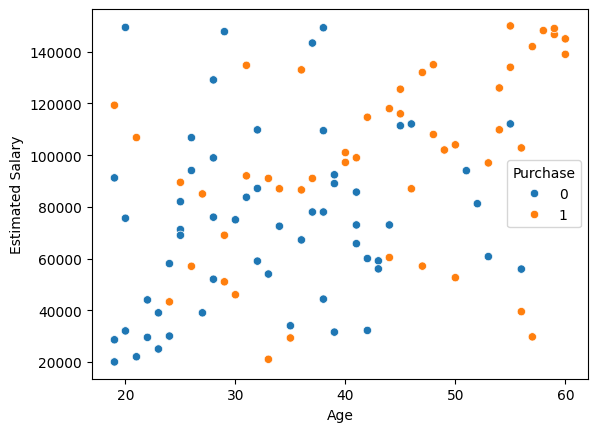

In [6]:
sns.scatterplot(x="Age",y="Estimated Salary",data=dataset,hue="Purchase")
plt.show()

In [7]:
dataset.isnull().sum()

Age                 0
Estimated Salary    0
Purchase            0
dtype: int64

In [8]:
x = dataset.iloc[:,:-1]
y = dataset["Purchase"]

In [9]:

sc = StandardScaler()

In [10]:
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [12]:

dt = DecisionTreeClassifier()

In [13]:
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
dt.score(x_test,y_test)*100

61.904761904761905

In [15]:
dt.predict([[56	,55920]])

c:\Users\vikas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

c:\Users\vikas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


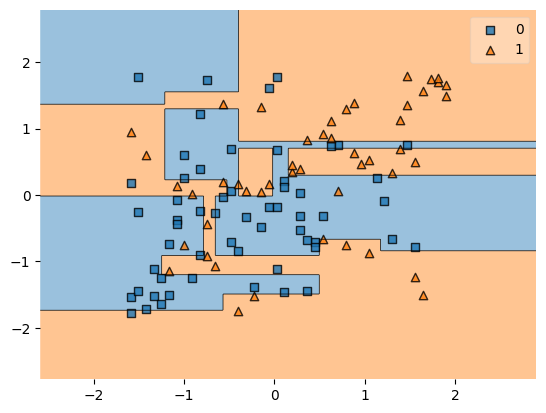

In [16]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

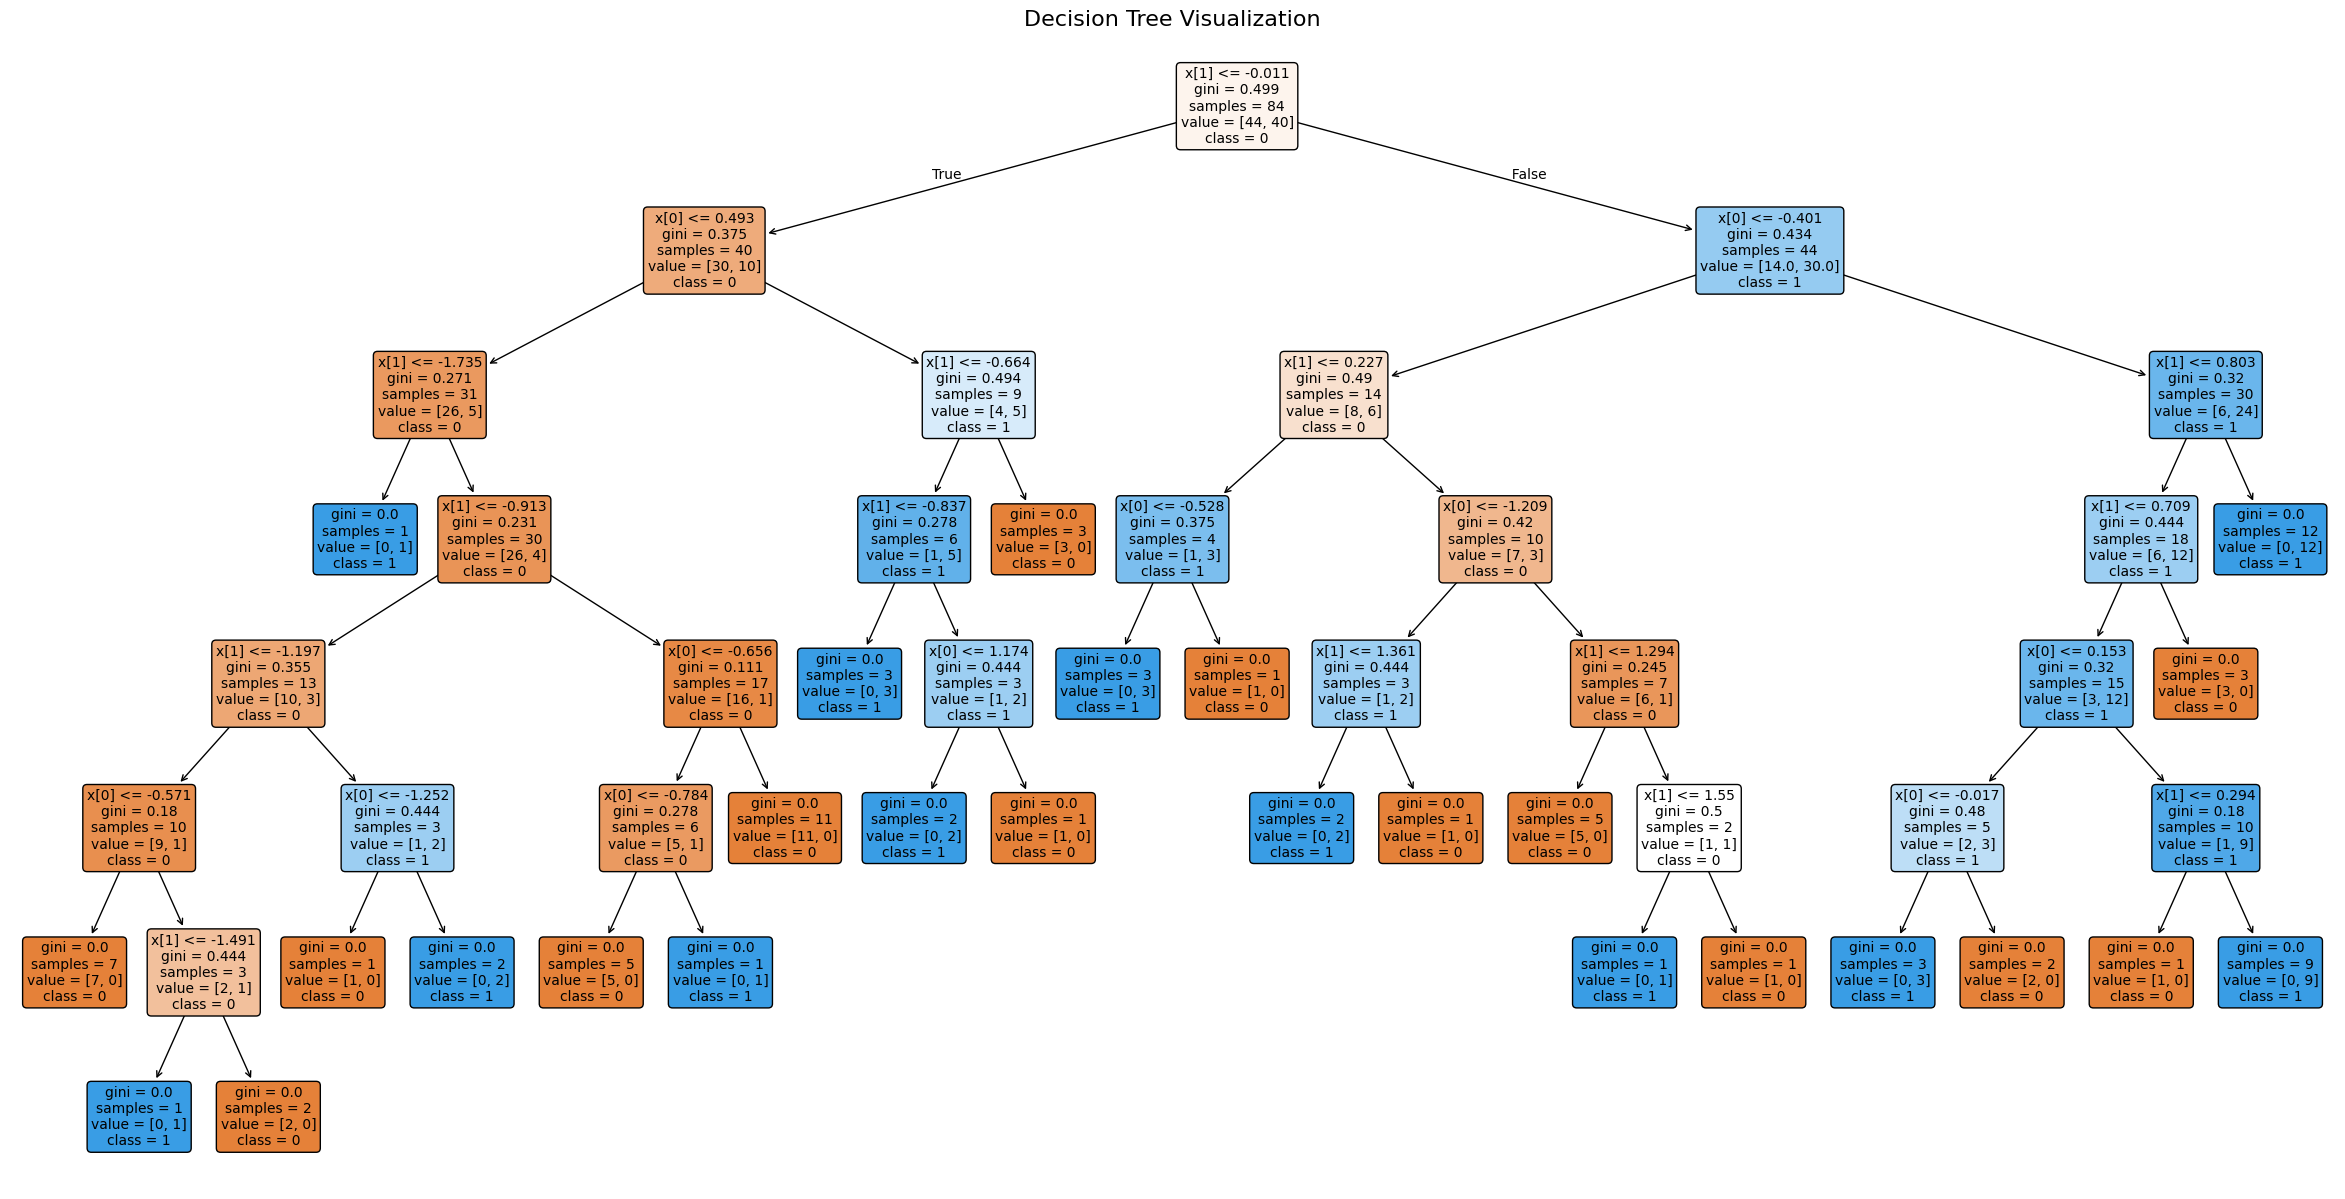

In [ ]:
plt.figure(figsize=(30, 15)) 
plot_tree(
    dt,
    filled=True,          
    rounded=True,         
    fontsize=10,         
    class_names=[str(c) for c in dt.classes_]  
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()
